In [1]:
def log_to_utilization_efficiency(problem_type, algorithm, heuristic, i):
    file = open("results/" + problem_type + "_" + algorithm + "_" + heuristic + "/log/log" + str(i), "r")
        
    i = 0
    prev_time = -100500.0
    prev_servers_number = 0
    prev_vms_number = 0
    servers_cpu_time = 0.0
    vms_cpu_time = 0.0
    
    for line in file:
        inp = line.split()
        
        time = float(inp[0])
        servers_number = int(inp[1])
        vms_number = int(inp[2])
            
        if i > 0:
            servers_cpu_time += (time - prev_time) * prev_servers_number
            vms_cpu_time += (time - prev_time) * prev_vms_number
            
        i += 1
        prev_time = time
        prev_servers_number = servers_number
        prev_vms_number = vms_number
    
    return (vms_cpu_time / servers_cpu_time if servers_cpu_time != 0 else -1)

In [2]:
def utilization_efficiency_all_runs(problem_type, algorithm, heuristic):
    result = list()
    
    for i in range(100):
        value = log_to_utilization_efficiency(problem_type, algorithm, heuristic, i + 1)
        if value != -1:
            result.append(value)
    
    return result

In [3]:
import statistics

###### FirstFit

In [4]:
utilization_efficiency_dynamicplacement_firstfit = utilization_efficiency_all_runs("dynamicplacement", "firstfit", "none")

In [5]:
print("Среднее значение эффективности утилизации:", end=" ")
print(statistics.mean(utilization_efficiency_dynamicplacement_firstfit))
print("Медиана эффективности утилизации:", end=" ")
print(statistics.median(utilization_efficiency_dynamicplacement_firstfit))
print("Стандартное отклонение эффективности утилизации:", end=" ")
print(statistics.pstdev(utilization_efficiency_dynamicplacement_firstfit))

Среднее значение эффективности утилизации: 16.44124751684238
Медиана эффективности утилизации: 15.970998768199188
Стандартное отклонение эффективности утилизации: 3.7134425259292114


In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Количество запусков')

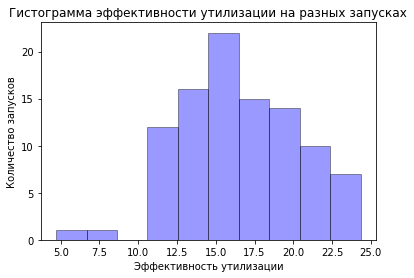

In [8]:
sns.distplot(utilization_efficiency_dynamicplacement_firstfit, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Гистограмма эффективности утилизации на разных запусках')
plt.xlabel('Эффективность утилизации')
plt.ylabel('Количество запусков')

###### BestFit с эвристикой Sum

In [9]:
utilization_efficiency_dynamicplacement_bestfit_sum = utilization_efficiency_all_runs("dynamicplacement", "bestfit", "sum")

In [10]:
print("Среднее значение эффективности утилизации:", end=" ")
print(statistics.mean(utilization_efficiency_dynamicplacement_bestfit_sum))
print("Медиана эффективности утилизации:", end=" ")
print(statistics.median(utilization_efficiency_dynamicplacement_bestfit_sum))
print("Стандартное отклонение эффективности утилизации:", end=" ")
print(statistics.pstdev(utilization_efficiency_dynamicplacement_bestfit_sum))

Среднее значение эффективности утилизации: 16.2257811086316
Медиана эффективности утилизации: 15.77895032973229
Стандартное отклонение эффективности утилизации: 3.6050228460544447


Text(0, 0.5, 'Количество запусков')

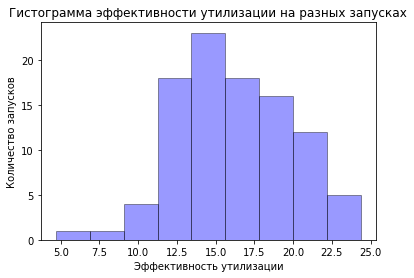

In [11]:
sns.distplot(utilization_efficiency_dynamicplacement_bestfit_sum, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Гистограмма эффективности утилизации на разных запусках')
plt.xlabel('Эффективность утилизации')
plt.ylabel('Количество запусков')

###### BestFit с эвристикой Prod

In [12]:
utilization_efficiency_dynamicplacement_bestfit_prod = utilization_efficiency_all_runs("dynamicplacement", "bestfit", "prod")

In [13]:
print("Среднее значение эффективности утилизации:", end=" ")
print(statistics.mean(utilization_efficiency_dynamicplacement_bestfit_prod))
print("Медиана эффективности утилизации:", end=" ")
print(statistics.median(utilization_efficiency_dynamicplacement_bestfit_prod))
print("Стандартное отклонение эффективности утилизации:", end=" ")
print(statistics.pstdev(utilization_efficiency_dynamicplacement_bestfit_prod))

Среднее значение эффективности утилизации: 15.797777541607422
Медиана эффективности утилизации: 15.205466501603567
Стандартное отклонение эффективности утилизации: 3.6226033209669914


Text(0, 0.5, 'Количество запусков')

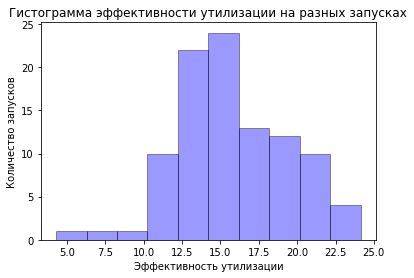

In [14]:
sns.distplot(utilization_efficiency_dynamicplacement_bestfit_prod, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Гистограмма эффективности утилизации на разных запусках')
plt.xlabel('Эффективность утилизации')
plt.ylabel('Количество запусков')

###### Mishra & Sahoo с целью балансировки нагрузки

In [15]:
utilization_efficiency_dynamicplacement_mishrasahoo_loadbalance = utilization_efficiency_all_runs("dynamicplacement", "mishrasahoo", "loadbalance")

In [16]:
print("Среднее значение эффективности утилизации:", end=" ")
print(statistics.mean(utilization_efficiency_dynamicplacement_mishrasahoo_loadbalance))
print("Медиана эффективности утилизации:", end=" ")
print(statistics.median(utilization_efficiency_dynamicplacement_mishrasahoo_loadbalance))
print("Стандартное отклонение эффективности утилизации:", end=" ")
print(statistics.pstdev(utilization_efficiency_dynamicplacement_mishrasahoo_loadbalance))

Среднее значение эффективности утилизации: 16.39796349030326
Медиана эффективности утилизации: 15.94377111927933
Стандартное отклонение эффективности утилизации: 3.708979934849924


Text(0, 0.5, 'Количество запусков')

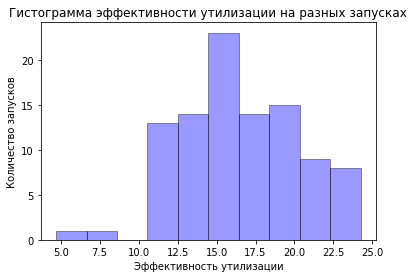

In [17]:
sns.distplot(utilization_efficiency_dynamicplacement_mishrasahoo_loadbalance, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Гистограмма эффективности утилизации на разных запусках')
plt.xlabel('Эффективность утилизации')
plt.ylabel('Количество запусков')

###### Mishra & Sahoo с целью консолидации

In [18]:
utilization_efficiency_dynamicplacement_mishrasahoo_consolidate = utilization_efficiency_all_runs("dynamicplacement", "mishrasahoo", "consolidate")

In [19]:
print("Среднее значение эффективности утилизации:", end=" ")
print(statistics.mean(utilization_efficiency_dynamicplacement_mishrasahoo_consolidate))
print("Медиана эффективности утилизации:", end=" ")
print(statistics.median(utilization_efficiency_dynamicplacement_mishrasahoo_consolidate))
print("Стандартное отклонение эффективности утилизации:", end=" ")
print(statistics.pstdev(utilization_efficiency_dynamicplacement_mishrasahoo_consolidate))

Среднее значение эффективности утилизации: 16.44473118470832
Медиана эффективности утилизации: 15.957668011276652
Стандартное отклонение эффективности утилизации: 3.7136859238424673


Text(0, 0.5, 'Количество запусков')

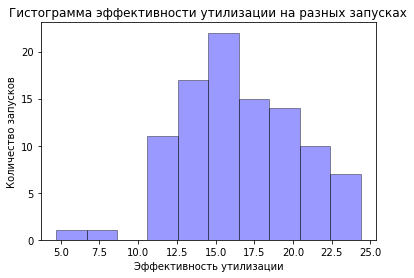

In [20]:
sns.distplot(utilization_efficiency_dynamicplacement_mishrasahoo_consolidate, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

plt.title('Гистограмма эффективности утилизации на разных запусках')
plt.xlabel('Эффективность утилизации')
plt.ylabel('Количество запусков')

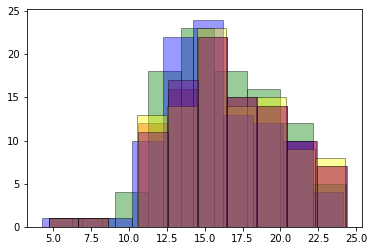

In [21]:
sns.distplot(utilization_efficiency_dynamicplacement_firstfit, hist=True, kde=False, color = 'red', hist_kws={'edgecolor':'black'})
sns.distplot(utilization_efficiency_dynamicplacement_bestfit_sum, hist=True, kde=False, color = 'green', hist_kws={'edgecolor':'black'})
sns.distplot(utilization_efficiency_dynamicplacement_bestfit_prod, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
sns.distplot(utilization_efficiency_dynamicplacement_mishrasahoo_loadbalance, hist=True, kde=False, color = 'yellow', hist_kws={'edgecolor':'black'})
sns.distplot(utilization_efficiency_dynamicplacement_mishrasahoo_consolidate, hist=True, kde=False, color = 'purple', hist_kws={'edgecolor':'black'})

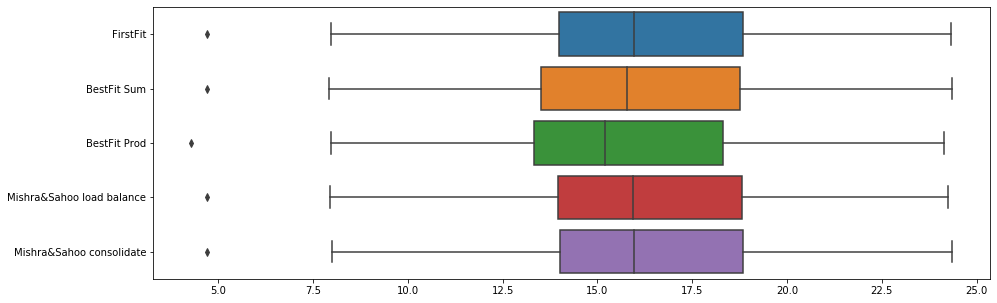

In [22]:
plt.figure(figsize=(15, 5))
sns.boxplot([utilization_efficiency_dynamicplacement_firstfit, utilization_efficiency_dynamicplacement_bestfit_sum,
           utilization_efficiency_dynamicplacement_bestfit_prod, utilization_efficiency_dynamicplacement_mishrasahoo_loadbalance,
           utilization_efficiency_dynamicplacement_mishrasahoo_consolidate],
           ['FirstFit', 'BestFit Sum', 'BestFit Prod', 'Mishra&Sahoo load balance', 'Mishra&Sahoo consolidate'])